In [2]:
import afloat
from afloat.operational import triangulate
import numpy as np
import matplotlib.pyplot as plt

51, L
51
L
Initial guess taken as drop location.
Optimization terminated successfully.
         Current function value: 26.012491
         Iterations: 72
         Function evaluations: 136
Distance 1 is 17.33362444399263
Distance 2 is 5.529465026083542
Distance 3 is 18.590862715733397
Total distance is 26.012491160119712
Unnamed object: -14.23066, 123.03313 [Uncertainty: 26 m]


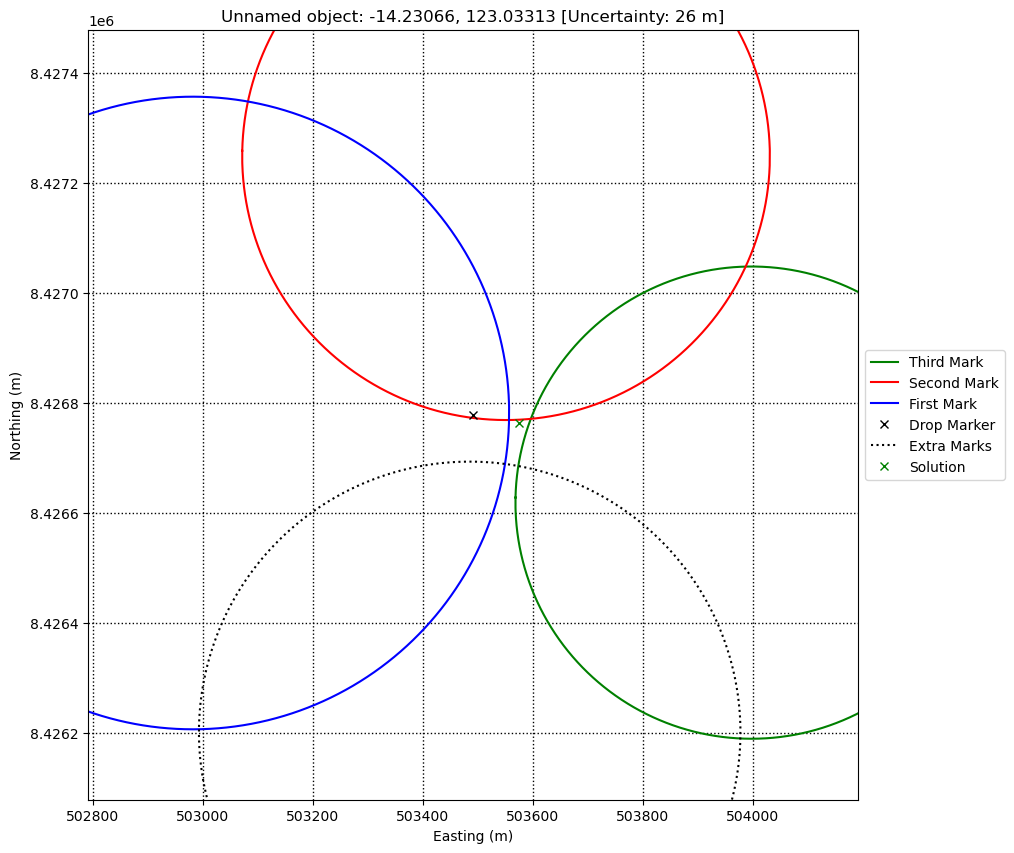

In [29]:
#L245

y = np.array([-14.2305,
-14.22627778,
-14.23197222,
-14.23575,])

x = np.array([123.0276389,
123.0329167,
123.0370556,
123.0323056,])

d = np.array([639,
533,
477,
547,])

x_drop = 123 + 1/60 + 56.5/3600
y_drop = -(14 + 13/60 + 49.9/3600)

d = 0.9*d # Made up curvatuture factor

[lat_L250, long_L250], [x_L250, y_L250] = triangulate(x, y, d, total_depth=245, responder_height=2, x_drop=x_drop, y_drop=y_drop)


51, L
51
L
Initial guess taken as drop location.
Optimization terminated successfully.
         Current function value: 43.463853
         Iterations: 69
         Function evaluations: 133
Distance 1 is 30.685023065530732
Distance 2 is 1.6830379383557177
Distance 3 is 30.736025255630533
Total distance is 43.463852863602135
Unnamed object: -14.23065, 123.03042 [Uncertainty: 43 m]


Text(503576.1299164777, 8426721.711973928, '   L245')

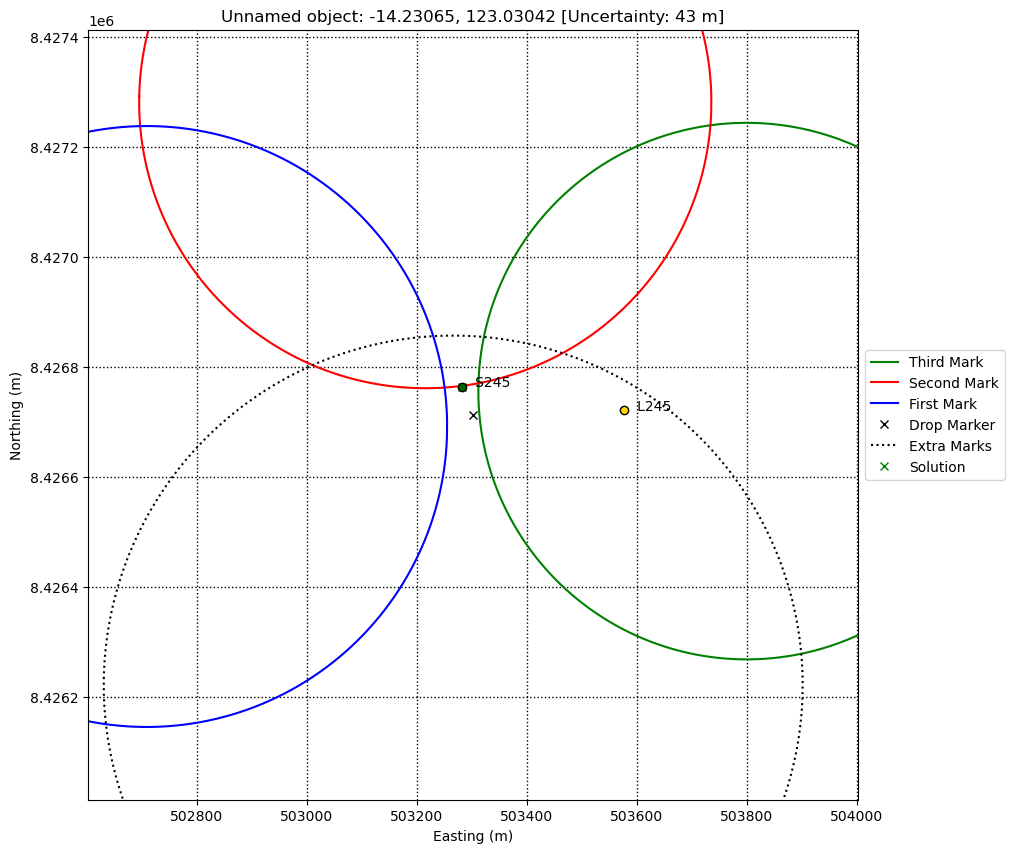

In [25]:
# S245
# WP472, 471, 470, 469
x = [[123, 1, 49.0], 
     [123, 1, 30.4],
     [123, 1, 47.3],
     [123, 2, 6.8]]
y = [[14, 14, 8],
     [14, 13, 52.7],
     [14, 13, 33.5],
     [14, 13, 50.6]] 
d = [706,
     607,
     578,
     542]

x = [x_[0]+x_[1]/60+x_[2]/3600 for x_ in x]
y = [y_[0]+y_[1]/60+y_[2]/3600 for y_ in y]

x = np.array(x)
y = -np.array(y)
d = np.array(d)

idx = np.array([1, 2, 3, 0])

x = x[idx]
y = y[idx]
d = d[idx]

x_drop = 123 + 1/60 + 50.2/3600
y_drop = -(14 + 13/60 + 52/3600)

d = 0.9*d # Made up curvatuture factor
[lat_S250, long_S250], [x_S250, y_S250]  = triangulate(x, y, d, total_depth=245, responder_height=2, x_drop=x_drop, y_drop=y_drop)

plt.plot(x_S250, y_S250, 'o', markerfacecolor='darkgreen', markeredgecolor='k')
plt.text(x_S250, y_S250, '   S245')
plt.plot(x_L250, y_L250, 'o', markerfacecolor='gold', markeredgecolor='k')
plt.text(x_L250, y_L250, '   L245')

UTM Zone: 51, L
Initial guess taken as drop location.
Optimization terminated successfully.
         Current function value: 9.514811
         Iterations: 69
         Function evaluations: 137
Distance 1 is 6.704342515417176
Distance 2 is 0.7460878694517417
Distance 3 is 6.710199341225638
Total distance is 9.514811131701897
Unnamed object: -14.13719, 122.83707 [Uncertainty: 10 m]


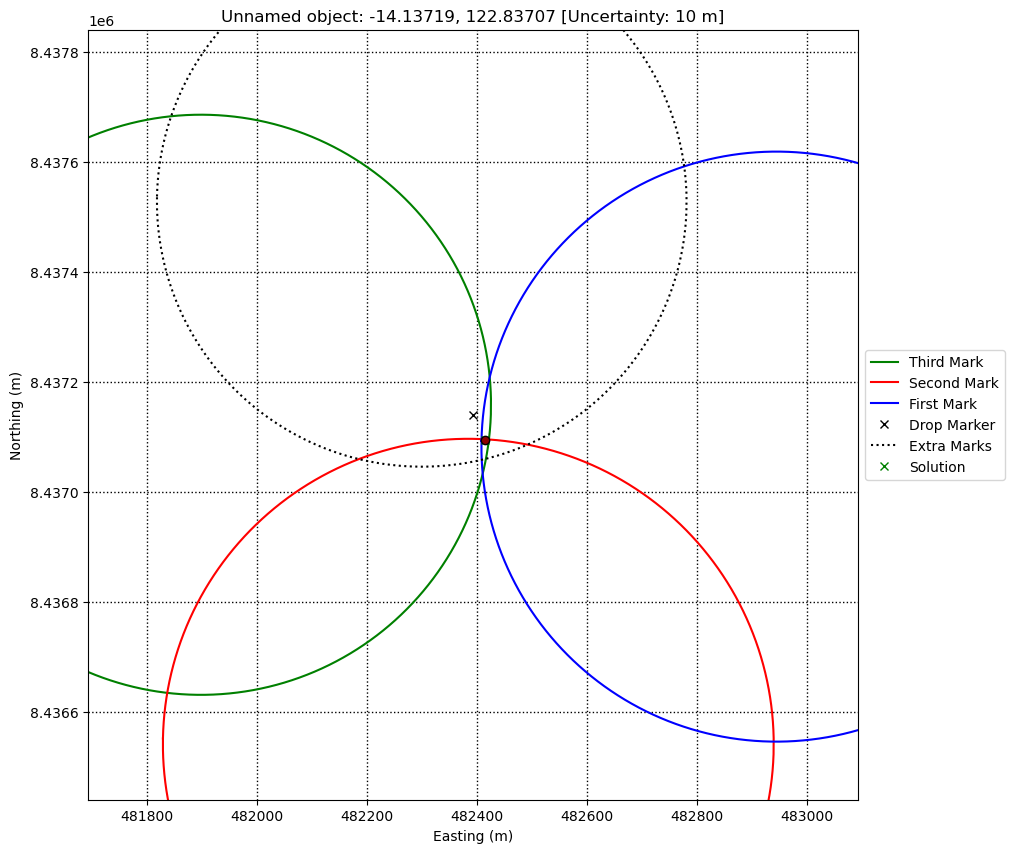

In [57]:
# W310
# WP481, 483, 484, 486
x = [[122, 50, 31.1], 
     [122, 50, 12.4],
     [122, 49, 56.2],
     [122, 50, 9.6]]
y = [[14, 8, 14.3],
     [14, 8, 31.9],
     [14, 8, 11.8],
     [14, 7, 59.8]] 
d = [596,
     617,
     586,
     535]

x = [x_[0]+x_[1]/60+x_[2]/3600 for x_ in x]
y = [y_[0]+y_[1]/60+y_[2]/3600 for y_ in y]

x = np.array(x)
y = -np.array(y)
d = np.array(d)

idx = np.array([1, 2, 3, 0])
idx = np.array([0, 1, 2, 3])

x = x[idx]
y = y[idx]
d = d[idx]

#WP480
x_drop = 122 + 50/60 + 12.7/3600
y_drop = -(14 + 8/60 + 12.4/3600)

d = 0.9*d # Made up curvatuture factor
[lat_W310, long_W310], [x_W310, y_W310]  = triangulate(x, y, d, total_depth=315, responder_height=2, x_drop=x_drop, y_drop=y_drop)

plt.plot(x_W310, y_W310, 'o', markerfacecolor='darkred', markeredgecolor='k')


In [58]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize
import utm

def triangulate2(x, 
                y, 
                ranges, 
                total_depth,
                responder_height,
                x_drop=None,
                y_drop=None, 
                name='Unnamed object', 
                coord_sys='latlon'):

    def get_circle(xc, yc, r):
    
        xs = np.arange(xc-(r-tol), xc+(r-tol), 0.01)
        ysq = np.power(r, 2) - np.power((xs-xc), 2)
        ys = np.sqrt(ysq) + yc
        ys_ = -np.sqrt(ysq) + yc

        ys = np.concatenate((ys, ys_, (ys[0],)), 0)
        xs = np.concatenate((xs, np.flip(xs, 0), (xs[0],)), 0)

        return xs, ys
    
    def calculate_distance(checkparams, verbose = False):
        
        xcheck = checkparams[0]
        ycheck = checkparams[1]

        d1 = np.min(np.sqrt((y1 - ycheck)**2 ++ (x1 - xcheck)**2))
        d2 = np.min(np.sqrt((y2 - ycheck)**2 ++ (x2 - xcheck)**2))
        d3 = np.min(np.sqrt((y3 - ycheck)**2 ++ (x3 - xcheck)**2))
        d = np.sqrt(d1**2 + d2**2 + d3**2)

        if verbose:
            print('Distance 1 is {0}'.format(d1))
            print('Distance 2 is {0}'.format(d2))
            print('Distance 3 is {0}'.format(d3))

            print('Total distance is {0}'.format(d))

        return d

    tol = 0.1 
    lex = 700 # Width of the final plot

    vert_disp = - responder_height
    
    
    assert(len(x)==len(y))
    assert(len(x)==len(ranges))
    
    
    fig, axes = plt.subplots(nrows=1, figsize=(10, 10))

    axes.set_xlabel('Easting (m)')
    axes.set_ylabel('Northing (m)')
    
    
    got_drop=False
    if not y_drop is None:
        if not x_drop is None:
            got_drop=True
            
    if got_drop:
        axes.set_xlim((x_drop-lex, x_drop+lex))
        axes.set_ylim((y_drop-lex, y_drop+lex))
        ph, = plt.plot(x_drop, y_drop, 'kx', label='Drop Marker')
        
    if coord_sys == 'latlon':
        if got_drop:
            x_drop, y_drop, zone1, zone2 = utm.from_latlon(y_drop, x_drop)

        for ii, (xi, yi) in enumerate(zip(x, y)):#np.arange(0, len(x_extra)):
            x[ii], y[ii], zone1, zone2 = utm.from_latlon(y[ii], x[ii])
            
            ri = np.sqrt(np.power(ranges[ii], 2) - np.power(vert_disp, 2))
            xi, yi = get_circle(x[ii], y[ii], ri)
            plt.plot(xi, yi, 'k:', label='Extra Marks')
            
    assert(len(x)>=3)

    print('UTM Zone: {0:.0f}, {1:s}'.format(zone1, zone2)) 
    # print(zone1)
    # print(zone2)

    # Only triangulates ont the first 3...
    r1 = np.sqrt(np.power(ranges[0], 2) - np.power(vert_disp, 2))
    r2 = np.sqrt(np.power(ranges[1], 2) - np.power(vert_disp, 2))
    r3 = np.sqrt(np.power(ranges[2], 2) - np.power(vert_disp, 2))

    # ... others are 'extra' and are plotted but not used
    ranges_extra = ranges[3::]
    x_extra = x[3::]
    y_extra = y[3::]
    
    x1, y1 = get_circle(x[0], y[0], r1)
    x2, y2 = get_circle(x[1], y[1], r2)
    x3, y3 = get_circle(x[2], y[2], r3)

    r3h, = plt.plot(x3, y3, 'g', label='Third Mark')
    r2h, = plt.plot(x2, y2, 'r', label='Second Mark')
    r1h, = plt.plot(x1, y1, 'b', label='First Mark')
    
    for ii in np.arange(0, len(y_extra)):

        re = np.sqrt(np.power(ranges_extra[ii], 2) - np.power(vert_disp, 2))

        xe, ye = get_circle(x_extra[ii], y_extra[ii], re)
        plt.plot(xe, ye, 'k:', label='Extra Marks')

#     calculate_distance([x_drop, y_drop])

    fh = lambda pos: calculate_distance(pos)

    if got_drop:
        print('Initial guess taken as drop location.')
        x0 = [x_drop, y_drop]
    else:
        print('Initial guess taken as average of all marks, regardless of range.')
        x0 = [np.mean(x), np.mean(y)]
        print(x0)
        
    locale = scipy.optimize.fmin(func=fh, x0=x0)
    # lat, long = utm.to_latlon(locale[0], locale[1], 50, 'K')
    lat, long = utm.to_latlon(locale[0], locale[1], zone1, zone2)

    foundh, = plt.plot(locale[0], locale[1], 'gx', label='Solution')

#     if got_drop:
#         d = calculate_distance(locale, verbose = True)
#         textt = name + ': {0:.0f}, {1:.0f} [error: {2:.0f} m]'.format(locale[0], locale[1], d)
#         textt = name + ': {0:.5f}, {1:.5f} [error: {2:.0f} m]'.format(lat, long, d)
#     else:
#         textt = name + ': {0:.0f}, {1:.0f}'.format(locale[0], locale[1])
#         textt = name + ': {0:.5f}, {1:.5f}'.format(lat, long)
    d = calculate_distance(locale, verbose = True)
    textt = name + ': {0:.0f}, {1:.0f} [Uncertainty: {2:.0f} m]'.format(locale[0], locale[1], d)
    textt = name + ': {0:.5f}, {1:.5f} [Uncertainty: {2:.0f} m]'.format(lat, long, d)

    print(textt)
    plt.title(textt)

    plt.gca().set_aspect('equal', adjustable='box') 
    axes.grid(color='k', linestyle=':', linewidth=1, zorder=-1)

#     axes.legend([ph, r1h, r2h, r3h, foundh], ['Drop Marker', 'Range 1', 'Range 2', 'Range 3', 'Solution'])
#     axes.legend()
    handles, labels = axes.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axes.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

    fullpathsave = '{name} Triangulation.png'.format(name=name)
    fig.savefig(fullpathsave)  
    
    return [lat, long], locale

UTM Zone: 51, L
Initial guess taken as drop location.
Optimization terminated successfully.
         Current function value: 18.868929
         Iterations: 68
         Function evaluations: 135
Distance 1 is 12.560547749059056
Distance 2 is 3.384320891952124
Distance 3 is 13.668047054639738
Total distance is 18.868929432904828
Unnamed object: -14.05234, 123.02929 [Uncertainty: 19 m]


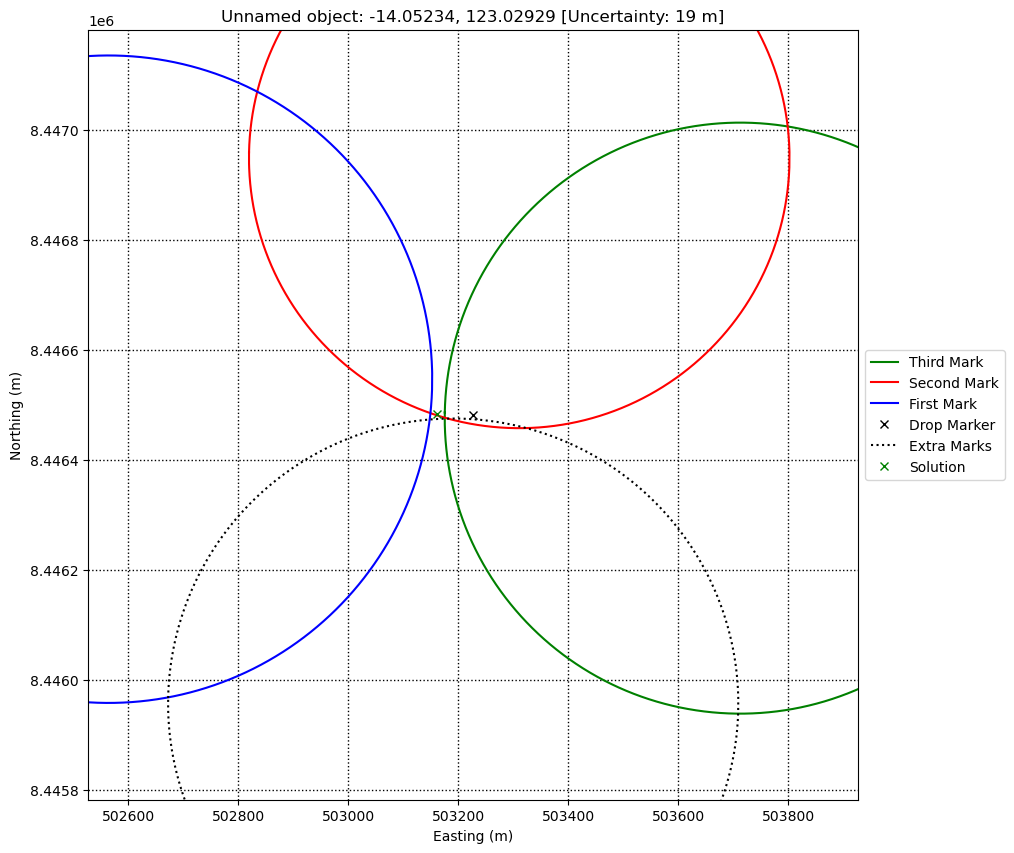

In [59]:
# N280
# WP481, 483, 484, 486
x = [[123, 1, 25.5],
     [123, 1, 50.4],
     [123, 2, 3.8],
     [123, 1, 46.4]]
y = [[14, 3, 6.4],
     [14, 2, 53.3],
     [14, 3, 8.7],
     [14, 3, 25.6]] 
d = [654, 546, 597, 576]

x = [x_[0]+x_[1]/60+x_[2]/3600 for x_ in x]
y = [y_[0]+y_[1]/60+y_[2]/3600 for y_ in y]

x = np.array(x)
y = -np.array(y)
d = np.array(d)

# idx = np.array([1, 2, 3, 0])
# idx = np.array([0, 1, 2, 3])

# x = x[idx]
# y = y[idx]
# d = d[idx]

#WP474
x_drop = 123 + 1/60 + 47.6/3600
y_drop = -(14 + 3/60 + 8.5/3600)
# x_drop = None
# y_drop = None

d = 0.9*d # Made up curvatuture factor
d = 1.0*d # Made up curvatuture factor
[lat_N280, long_N280], [x_N280, y_N280]  = triangulate(x, y, d, total_depth=315, responder_height=2, x_drop=x_drop, y_drop=y_drop)

# plt.plot(x_W310, y_W310, 'o', markerfacecolor='darkred', markeredgecolor='k')

S245 123.03041737634493 -14.230653066337094
L245 123.03312786502875 -14.230660262826481
W310 122.8370658081835 -14.13718816307405
N280 123.02928797854348 -14.052341197573492


[]

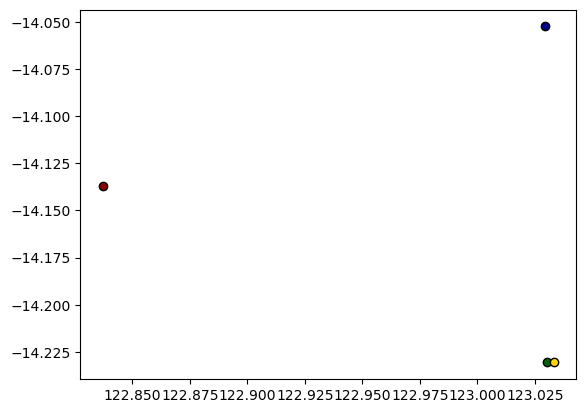

In [73]:
print("S245", long_S250, lat_S250)
print("L245", long_L250, lat_L250)
print("W310", long_W310, lat_W310)
print("N280", long_N280, lat_N280)

plt.plot(long_S250, lat_S250, 'o', markerfacecolor='darkgreen', markeredgecolor='k')
plt.plot(long_L250, lat_L250, 'o', markerfacecolor='gold', markeredgecolor='k')
plt.plot(long_W310, lat_W310, 'o', markerfacecolor='darkred', markeredgecolor='k')
plt.plot(long_N280, lat_N280, 'o', markerfacecolor='darkblue', markeredgecolor='k')

plt.plot()

# plt.gca().set_aspect('equal')
# plt.gca().grid('on')